In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/mission 2.csv')
data.head(10)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979
5,Urban,3072,2,2,1988,5,418501
6,Rural,1979,2,3,1982,5,433934
7,Rural,2353,3,3,1975,3,172402
8,Urban,1636,4,2,1957,4,215421
9,Urban,1520,2,2,1965,2,325987


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Location     1000 non-null   object
 1   Size (sqft)  1000 non-null   int64 
 2   Bedrooms     1000 non-null   int64 
 3   Bathrooms    1000 non-null   int64 
 4   Year Built   1000 non-null   int64 
 5   Condition    1000 non-null   int64 
 6   Price        1000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 54.8+ KB


In [ ]:
print(data.columns)

Index(['Location', 'Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built',
       'Condition', 'Price'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Location']=le.fit_transform(data['Location'])

In [ ]:
from sklearn.preprocessing import StandardScaler
Se=StandardScaler()
data[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']]=Se.fit_transform(
    data[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']])

In [ ]:
data.describe()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,1.020000,2.913225e-16,9.769963e-17,4.618528e-17,2.664535e-16,-6.394885e-17,282989.120000
std,0.815024,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,130220.566705
min,0.000000,-1.981435e+00,-1.235625e+00,-1.231835e+00,-1.653187e+00,-1.397988e+00,54748.000000
25%,0.000000,-7.506603e-01,-1.235625e+00,-1.231835e+00,-9.442932e-01,-7.344908e-01,172402.000000
50%,1.000000,-5.631023e-02,2.468285e-01,1.244278e-02,-9.362118e-02,-7.099414e-02,309747.000000
75%,2.000000,8.142377e-01,9.880552e-01,1.256721e+00,8.988295e-01,1.255999e+00,391003.000000
max,2.000000,1.780063e+00,1.729282e+00,1.256721e+00,1.607723e+00,1.255999e+00,498345.000000


In [ ]:
data.head()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542
4,2,0.202113,-1.235625,-1.231835,-1.133331,-0.734491,316979


In [ ]:
# Histgarm for Price , ScatterPlot for Price and Size , BarPlot for Location and Price

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

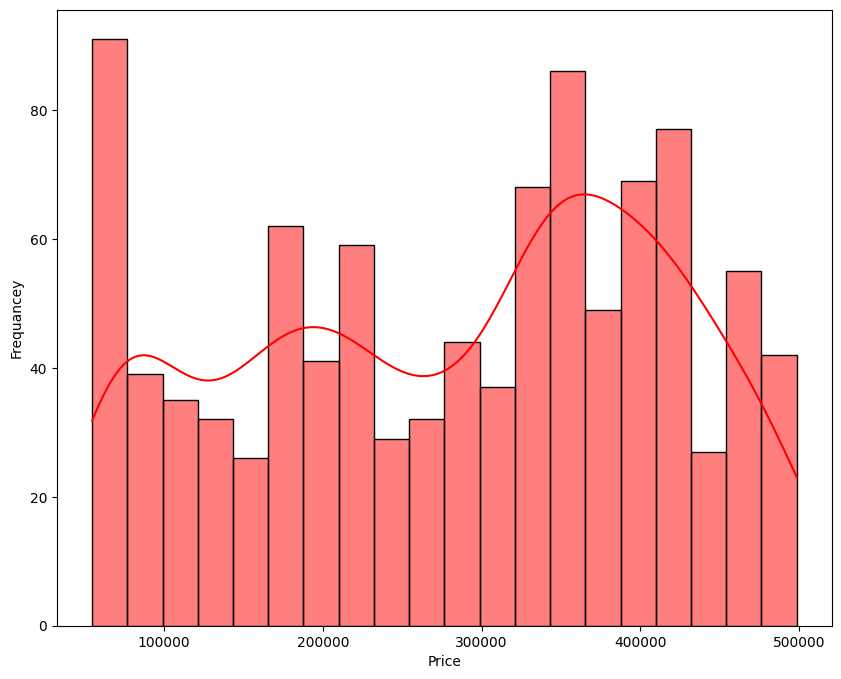

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data['Price'],kde=True,bins=20,color='Red')
plt.title="Price_Hist"
plt.xlabel="House_Price"
plt.ylabel("Frequancey")
plt.show()

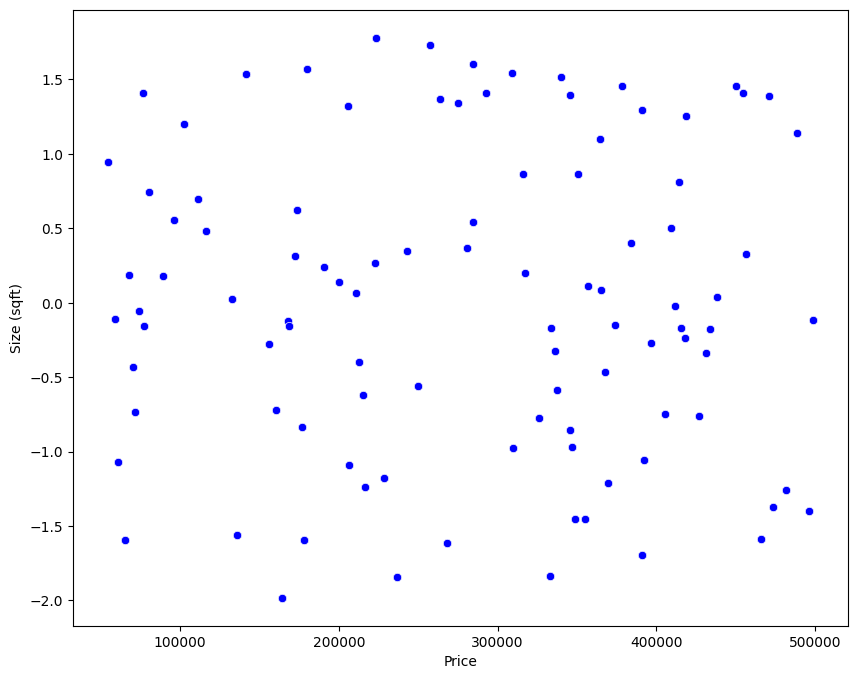

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['Price'],y=data['Size (sqft)'],color='Blue')
plt.title='Price To Size'
plt.xlabel='Price'
plt.xlabel='Size'
plt.show()

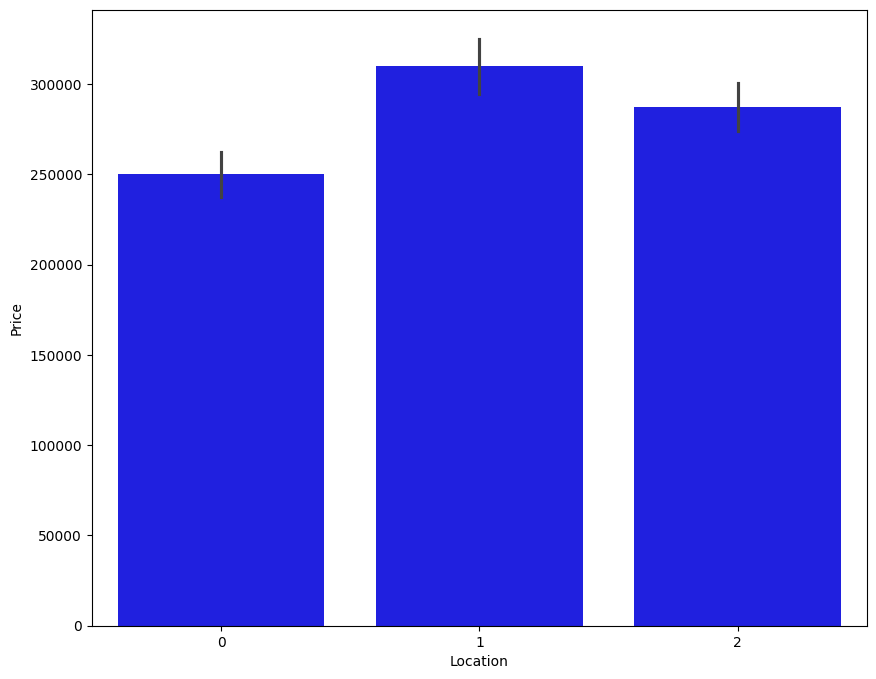

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Location'],y=data['Price'],color='Blue')
plt.title='Location To Price'
plt.xlabel='location'
plt.xlabel='Price'
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop('Price',axis=1)
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE , r2_score as R2 , mean_squared_error as MSE

In [ ]:
Le_Model=LinearRegression()
DTR_Model=DecisionTreeRegressor()
RFR_Model=RandomForestRegressor()
Le_Model.fit(x_train,y_train)
DTR_Model.fit(x_train,y_train)
RFR_Model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_Pred_Le=Le_Model.predict(x_test)
y_Pred_DTR=DTR_Model.predict(x_test)
y_Pred_RFR=RFR_Model.predict(x_test)

In [ ]:
print('MSE: ',MSE(y_Pred_Le,y_test))
print('MSE: ',MSE(y_Pred_DTR,y_test))
print('MSE: ',MSE(y_Pred_RFR,y_test))

MSE:  15770483148.400627
MSE:  0.0
MSE:  1964352.0313


In [ ]:
print('R2: ',R2(y_Pred_Le,y_test))
print('R2: ',R2(y_Pred_DTR,y_test))
print('R2: ',R2(y_Pred_RFR,y_test))

R2:  -10.302021133593533
R2:  1.0
R2:  0.9998831574973537


In [ ]:
print('MAE: ',MAE(y_Pred_Le,y_test))
print('MAE: ',MAE(y_Pred_DTR,y_test))
print('MAE: ',MAE(y_Pred_RFR,y_test))

MAE:  109912.47385351837
MAE:  0.0
MAE:  459.7874


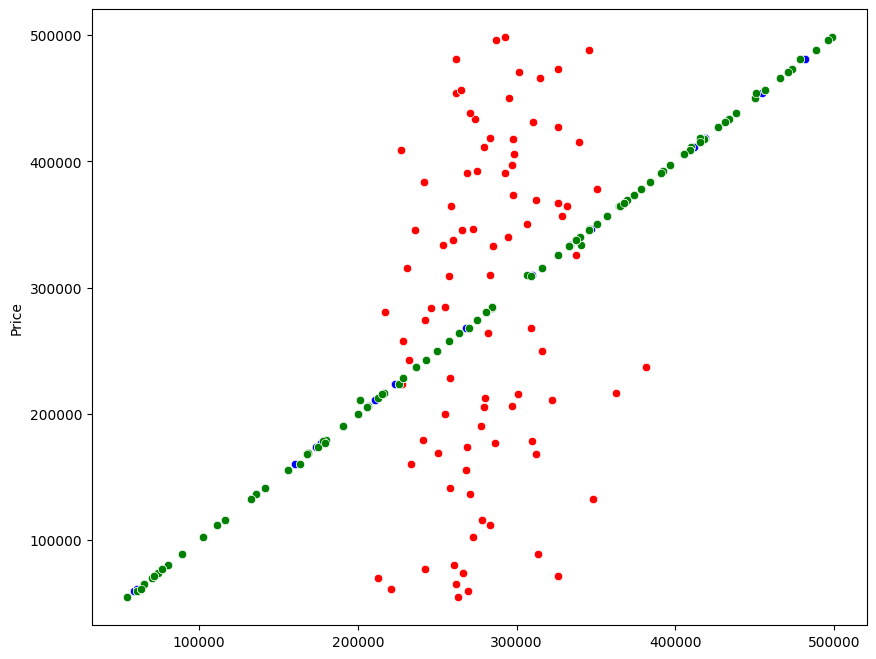

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_Pred_Le,y=y_test,color="Red")
sns.scatterplot(x=y_Pred_DTR,y=y_test,color="Blue")
sns.scatterplot(x=y_Pred_RFR,y=y_test,color="Green")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
Grid_Pram={'max_depth':[5,10,20,30,40], 'max_leaf_nodes':[10,20,30,40,50]}
Grid_Model=GridSearchCV(DecisionTreeRegressor(),Grid_Pram,cv=5)
Grid_Model.fit(x_train,y_train)
print('Best Prams: ',Grid_Model.best_params_)

Best Prams:  {'max_depth': 20, 'max_leaf_nodes': 50}


In [ ]:
y_predict_GridModel=Grid_Model.best_estimator_.predict(x_test)

print('MAE: ',MAE(y_predict_GridModel,y_test))
print('MSE: ',MSE(y_predict_GridModel,y_test))
print('R2 ',R2(y_predict_GridModel,y_test))

MAE:  17223.220838076657
MSE:  596106164.7012935
R2  0.9640339705661112


In [ ]:
Rand_Pram={'n_estimators':[5,10,20,30],'max_depth':[5,10,20,30,40]}
Rand_Model=RandomizedSearchCV(RandomForestRegressor(),Rand_Pram,cv=5)
Rand_Model.fit(x_train,y_train)
print('Best Prams: ',Rand_Model.best_params_)

Best Prams:  {'n_estimators': 30, 'max_depth': 20}


In [ ]:
y_predict_RandModel=Rand_Model.best_estimator_.predict(x_test)
print('MAE: ',MAE(y_predict_RandModel,y_test))
print('MSE: ',MSE(y_predict_RandModel,y_test))
print('R2 ',R2(y_predict_RandModel,y_test))

MAE:  391.4061666666662
MSE:  2510118.9399388838
R2  0.9998511131471112


In [ ]:
!pip install gradio

In [ ]:
data.head(5)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,-1.067816,1.729282,-1.231835,1.040608,1.255999,61023
1,2,-1.240099,-1.235625,1.256721,-1.133331,-1.397988,216619
2,2,-0.121569,-1.235625,0.012443,-0.093621,1.255999,168012
3,1,-1.088699,-0.494398,-1.231835,0.898830,-1.397988,206542
4,2,0.202113,-1.235625,-1.231835,-1.133331,-0.734491,316979


In [ ]:
  ScalledCols2=data[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']]
  ScalledCols2=Se.transform(ScalledCols2)

In [ ]:
import gradio as gr
def predict(Location,Size,Bed,Bath,Year,Condition):
  inputData=pd.DataFrame({
      'Location':[Location],
      'Size (sqft)':[Size],
      'Bedrooms':[Bed],
      'Bathrooms':[Bath],
      'Year Built':[Year],
      'Condition':[Condition]})
  inputData['Location']=le.transform(inputData['Location'])
  ScalledCols2=data[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built','Condition']]
  ScalledCols2=Se.transform(ScalledCols2)
  result=RFR_Model.predict(inputData)
  return f'House Price: ${result[0]:,.2f}'
gr.Interface(
    fn=predict,
    title='House Price Prediction',
    inputs=[
        gr.Dropdown(choices=['Rural','Urban','Suburban'],label='Location'),
        gr.Number(label='Size'),
        gr.Number(label='BedRoom'),
        gr.Number(label='BathRoom'),
        gr.Number(label='Year Built'),
        gr.Number(label='Condition'),
    ],
outputs='text',
).launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7158a6c2397599665b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7865 <> https://7158a6c2397599665b.gradio.live
